<a href="https://colab.research.google.com/github/Onur-Caliskan/Deep-Learning-Hw/blob/main/Image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 #opencv
import numpy as np
from matplotlib import pyplot as plt

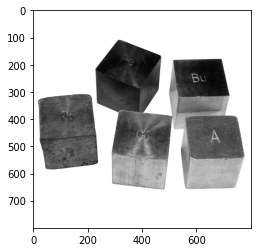

In [ ]:
scene= cv2.imread('q01-cubes.jpeg',cv2.IMREAD_GRAYSCALE)#image read function, pass the path of image
#we will use grayscale image to make operations easier(colors in 1 dimension)
plt.imshow(scene, cmap="gray")

In [ ]:
def plot_filtered_image(source, filtered_img):
  plt.figure(figsize=(10,10))
  plt.subplot(121) # 1 row, 2 columns, index of that plot is 1
  plt.imshow(source, cmap="gray")
  plt.title("original")

  plt.subplot(122)
  plt.imshow(filtered_img,cmap="gray")
  plt.title("filtered image")


Horizontal Edge Detection

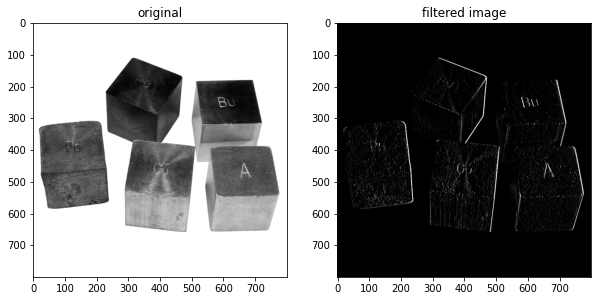

In [ ]:
kernel_h=np.array([ #derivative kernels
    [-1,0,1], # 0-> current element we are searching/difference in the horizontal axis
    [-2,0,2], 
    [-1,0,1]
])

filtered_img=cv2.filter2D(src=scene, ddepth=-1, kernel=kernel_h)

plot_filtered_image(scene, filtered_img)

Vertical Edge Detection

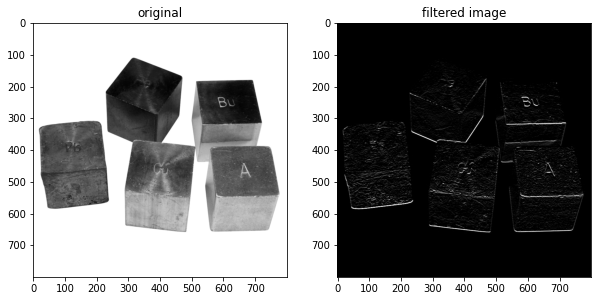

In [ ]:
kernel_v= np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

filtered_img=cv2.filter2D(src=scene,ddepth=-1,kernel=kernel_v)

plot_filtered_image(scene, filtered_img)

Edge Detection

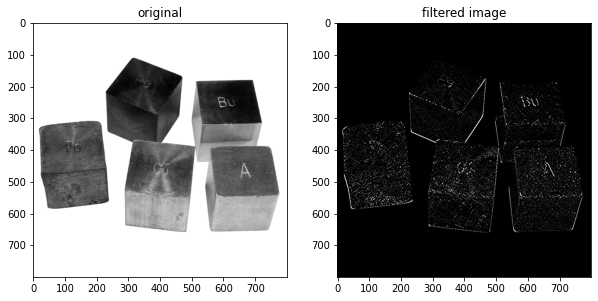

In [ ]:
filtered_img=cv2.filter2D(src=scene,ddepth=-1,kernel=kernel_v)
filtered_img=cv2.filter2D(src=filtered_img,ddepth=-1,kernel=kernel_h)

plot_filtered_image(scene, filtered_img)

QUESTION 2

In [ ]:
scene02=cv2.imread('q02-scene.png',cv2.IMREAD_GRAYSCALE)
ref_img=cv2.imread('q02-reference.png',cv2.IMREAD_GRAYSCALE)
mario=scene02[265:300, 600:630]
mushroom=scene[330:365, 900:950]
pipe=scene[290:380, 580:620]

Text(0.5, 1.0, 'mushroom example')

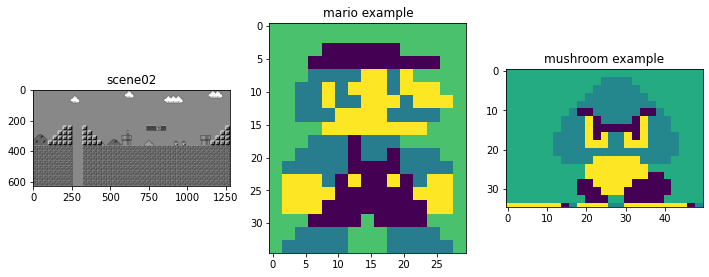

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(131)
plt.imshow(scene02, cmap="gray")
plt.title("scene02")

plt.subplot(132)
plt.imshow(mario)
plt.title("mario example")

plt.subplot(133)
plt.imshow(mushroom)
plt.title("mushroom example")




Detecting the Mario

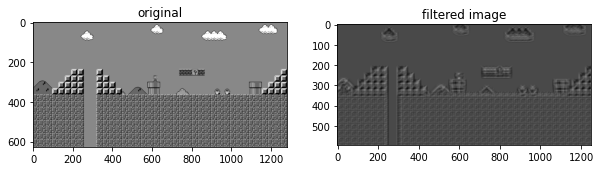

In [ ]:
corr_img=cv2.matchTemplate(scene,mario,cv2.TM_CCOEFF_NORMED)#normalized correlation coefficient

plot_filtered_image(scene02,corr_img)

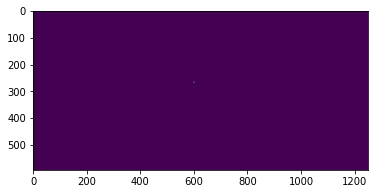

In [ ]:
treshold=0.6

plt.imshow(corr_img>treshold)

In [ ]:
x,y=np.where(corr_img>treshold) #locations of the bright circles

In [ ]:
scene_bgr=cv2.cvtColor(scene02.copy(),cv2.COLOR_GRAY2BGR)
ghost_size=mario.shape
for i in range(len(x)):
  cv2.rectangle(scene_bgr, #image that u want to put to rectangle
                (y[i],x[i]),
                (y[i]+ghost_size[0],x[i]+ghost_size[1])
                ,(0,255,0)#green rectangle
                ,1)#thickness of the rectangle

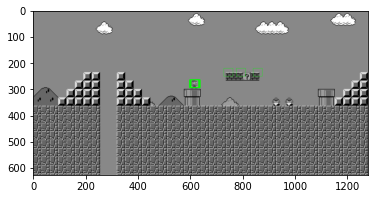

In [ ]:
plt.imshow(scene_bgr, cmap="gray")

Detecting the Mushrooms

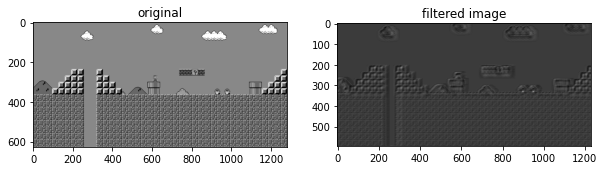

In [ ]:
corr_img=cv2.matchTemplate(scene02,mushroom,cv2.TM_CCOEFF_NORMED)#normalized correlation coefficient

plot_filtered_image(scene02,corr_img)

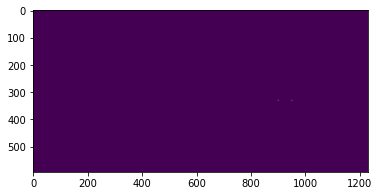

In [ ]:
treshold=0.6

plt.imshow(corr_img>treshold)

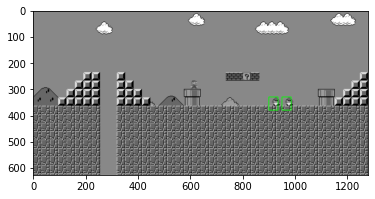

In [ ]:
x,y=np.where(corr_img>treshold) #locations of the bright circles

scene_bgr=cv2.cvtColor(scene02.copy(),cv2.COLOR_GRAY2BGR)
ghost_size=mushroom.shape
for i in range(len(x)):
  cv2.rectangle(scene_bgr, #image that u want to put to rectangle
                (y[i],x[i]),
                (y[i]+ghost_size[0],x[i]+ghost_size[1])
                ,(0,255,0)#green rectangle
                ,1)#thickness of the rectangle

plt.imshow(scene_bgr, cmap="gray")

Detecting the Pipes

Text(0.5, 1.0, 'pipe example')

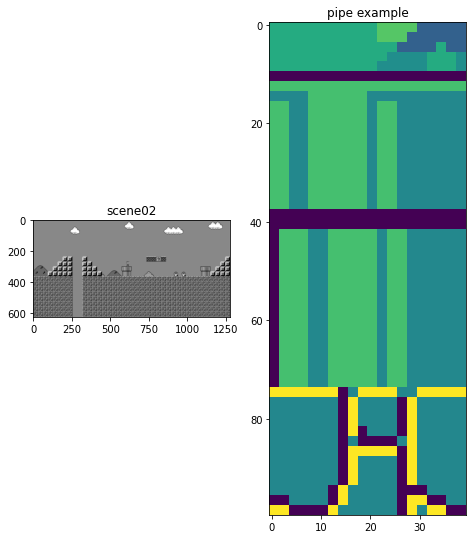

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(131)
plt.imshow(scene02, cmap="gray")
plt.title("scene02")

plt.subplot(132)
plt.imshow(pipe)
plt.title("pipe example")
